<a href="https://colab.research.google.com/github/Roshni-Bala/Product-Recommendation-System/blob/main/Product_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen
import torch
import numpy as np

In [ ]:
!wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/metaFiles2/meta_Appliances.json.gz

--2023-12-08 18:56:44--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/metaFiles2/meta_Appliances.json.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59884788 (57M) [application/x-gzip]
Saving to: ‘meta_Appliances.json.gz’

meta_Appliances.jso 100%[===================>]  57.11M  60.3MB/s    in 0.9s    

2023-12-08 18:56:45 (60.3 MB/s) - ‘meta_Appliances.json.gz’ saved [59884788/59884788]



In [ ]:
def open_to_df(file):
  data = []
  with gzip.open(file) as f:
      for l in f:
          data.append(json.loads(l.strip()))

  df = pd.DataFrame.from_dict(data)
  return df

In [ ]:
metadata = open_to_df('meta_Appliances.json.gz')
metadata.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,"[Appliances, Refrigerators, Freezers & Ice Mak...","class=""a-keyvalue prodDetTable"" role=""present...",[],,Tupperware Freezer Square Round Container Set ...,[],,Tupperware,[Each 3-pc. set includes two 7/8-cup/200 mL an...,"[>#39,745 in Appliances (See top 100)]",[],{},Appliances,,"November 19, 2008",,7301113188,[],[]
1,"[Appliances, Refrigerators, Freezers & Ice Mak...","class=""a-keyvalue prodDetTable"" role=""present...",[2 X Tupperware Pure & Fresh Unique Covered Co...,,2 X Tupperware Pure &amp; Fresh Unique Covered...,[],,Tupperware,[2 X Tupperware Pure & Fresh Unique Covered Co...,"[>#6,118 in Appliances (See top 100)]",[B004RUGHJW],{},Appliances,,"June 5, 2016",$3.62,7861850250,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,"[Appliances, Parts &amp; Accessories]",,[],,The Cigar - Moments of Pleasure,[],,The Cigar Book,[],"[>#1,861,816 in Home &amp; Kitchen (See Top 10...","[B01HCAVSLK, 1632206579]",{},Amazon Home,,,$150.26,8792559360,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,"[Appliances, Parts & Accessories]","class=""a-keyvalue prodDetTable"" role=""present...","[Multi purpost descaler, especially suited to ...",,Caraselle 2X 50G Appliance Descalene,[],,Caraselle,[],"[>#1,654,505 in Tools & Home Improvement (See ...",[],{},Tools & Home Improvement,,"December 17, 2014",.a-box-inner{background-color:#fff}#alohaBuyBo...,9792954481,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,"[Appliances, Parts & Accessories, Range Parts ...","class=""a-keyvalue prodDetTable"" role=""present...",[Full gauge and size beveled-edge; furnished w...,,EATON Wiring 39CH-SP-L Arrow Hart 1-Gang Chrom...,[],,EATON Wiring,[Returns will not be honored on this closeout ...,"[>#3,066,990 in Tools & Home Improvement (See ...",[],{},Tools & Home Improvement,,"January 16, 2007",$3.43,B00002N5EL,[],[]


In [ ]:
# metadata.to_csv('metadata.csv',escapechar='\\')

In [ ]:
!wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Appliances.json.gz

--2023-12-08 18:57:00--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Appliances.json.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69677301 (66M) [application/x-gzip]
Saving to: ‘Appliances.json.gz’

Appliances.json.gz  100%[===================>]  66.45M  69.4MB/s    in 1.0s    

2023-12-08 18:57:01 (69.4 MB/s) - ‘Appliances.json.gz’ saved [69677301/69677301]



In [ ]:
userrating = open_to_df('Appliances.json.gz')
userrating.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,2,False,"11 27, 2013",A3NHUQ33CFH3VM,1118461304,{'Format:': ' Hardcover'},Greeny,Not one thing in this book seemed an obvious o...,Clear on what leads to innovation,1385510400,NaN
1,5.0,NaN,False,"11 1, 2013",A3SK6VNBQDNBJE,1118461304,{'Format:': ' Kindle Edition'},Leif C. Ulstrup,I have enjoyed Dr. Alan Gregerman's weekly blo...,Becoming more innovative by opening yourself t...,1383264000,NaN
2,5.0,NaN,False,"10 10, 2013",A3SOFHUR27FO3K,1118461304,{'Format:': ' Hardcover'},Harry Gilbert Miller III,Alan Gregerman believes that innovation comes ...,The World from Different Perspectives,1381363200,NaN
3,5.0,NaN,False,"10 9, 2013",A1HOG1PYCAE157,1118461304,{'Format:': ' Hardcover'},Rebecca Ripley,"Alan Gregerman is a smart, funny, entertaining...",Strangers are Your New Best Friends,1381276800,NaN
4,5.0,10,False,"09 7, 2013",A26JGAM6GZMM4V,1118461304,{'Format:': ' Hardcover'},Robert Morris,"As I began to read this book, I was again remi...","How and why it is imperative to engage, learn ...",1378512000,NaN


In [ ]:
# userrating.to_csv('userrating.csv')

In [ ]:
userrating.describe()

,overall,unixReviewTime
count,602777.000000,6.027770e+05
mean,4.274209,1.455049e+09
std,1.301597,5.481787e+07
min,1.000000,9.722592e+08
25%,4.000000,1.423613e+09
50%,5.000000,1.464134e+09
75%,5.000000,1.496016e+09
max,5.000000,1.538611e+09


In [ ]:
select_item_col = ['asin','title','brand']
itemdata = metadata[select_item_col].copy()
itemdata.head()

,asin,title,brand
0,7301113188,Tupperware Freezer Square Round Container Set ...,Tupperware
1,7861850250,2 X Tupperware Pure &amp; Fresh Unique Covered...,Tupperware
2,8792559360,The Cigar - Moments of Pleasure,The Cigar Book
3,9792954481,Caraselle 2X 50G Appliance Descalene,Caraselle
4,B00002N5EL,EATON Wiring 39CH-SP-L Arrow Hart 1-Gang Chrom...,EATON Wiring


In [ ]:
select_userreview_col = ['reviewerID', 'asin', 'overall', 'unixReviewTime']
userdata = userrating[select_userreview_col].copy()
userdata.head()

,reviewerID,asin,overall,unixReviewTime
0,A3NHUQ33CFH3VM,1118461304,5.0,1385510400
1,A3SK6VNBQDNBJE,1118461304,5.0,1383264000
2,A3SOFHUR27FO3K,1118461304,5.0,1381363200
3,A1HOG1PYCAE157,1118461304,5.0,1381276800
4,A26JGAM6GZMM4V,1118461304,5.0,1378512000


In [ ]:
cdata = pd.merge(userdata, itemdata, on='asin', how='inner')
cdata.head(2)

,reviewerID,asin,overall,unixReviewTime,title,brand
0,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
1,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton


In [ ]:
cdata['overall'].unique()

array([5., 4., 3., 1., 2.])

In [ ]:
cdata['reviewerID'].describe()

count            615747
unique           514945
top       A8WEXFRWX1ZHH
freq                208
Name: reviewerID, dtype: object

In [ ]:
total_user_id = len(cdata['reviewerID'].unique())
print(total_user_id)

514945


In [ ]:
cdata.isnull().sum()

reviewerID        0
asin              0
overall           0
unixReviewTime    0
title             0
brand             0
dtype: int64

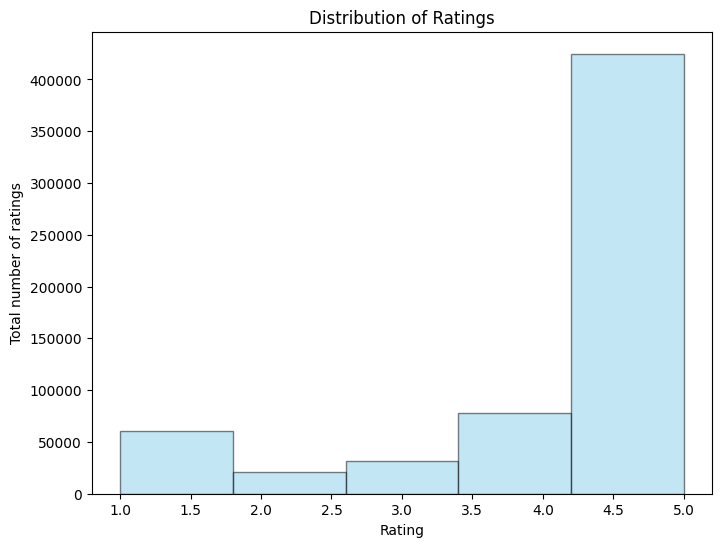

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(cdata['overall'], bins=5, alpha=0.5, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Total number of ratings')
plt.title('Distribution of Ratings')
plt.grid(False)
plt.show()

In [ ]:
review_counts = cdata.groupby('reviewerID')['overall'].count().sort_values(ascending=False)
review_counts.describe()

count    514945.000000
mean          1.195753
std           1.089122
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         208.000000
Name: overall, dtype: float64

In [ ]:
sum(review_counts>=5)

1856

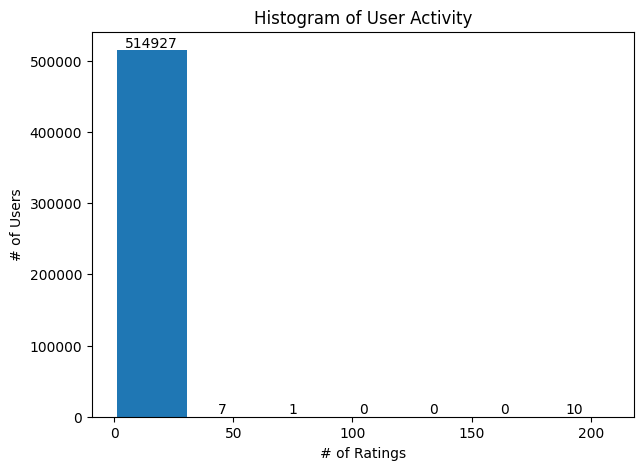

In [ ]:
plt.figure(figsize=(7,5))
_, _, bars = plt.hist(review_counts, bins=7)
plt.bar_label(bars)
plt.title('Histogram of User Activity')
plt.xlabel('# of Ratings')
plt.ylabel('# of Users')
plt.show()

In [ ]:
average_ratings = cdata.groupby(["title"])["overall"].mean()
average_ratings.nlargest(5)

title
 316407400 Frigidaire Range Glide                      5.0
 3348552 Whirlpool Washer Hose, Pump To Drain          5.0
 3957749 DRYER KNOB WHIRLPOOL ROPER USED PART fc       5.0
 53709-28 Maytag Refrigerator Hinge Upper Dr           5.0
 8544935 WASHER CONTROL KNOB WHIRLPOOL USED PART fc    5.0
Name: overall, dtype: float64

In [ ]:
cdata.head(3)

,reviewerID,asin,overall,unixReviewTime,title,brand
0,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
1,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton
2,A3TIWHNJXMSIU7,B00002N7IL,5.0,1522022400,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton


In [ ]:
itemnum_2_itemid = list(cdata['asin'].unique())
itemnum_2_itemid.sort()
itemid_2_itemnum = {c:i for i,c in enumerate(itemnum_2_itemid)}
cdata['asin_id'] = cdata['asin'].apply(lambda x: itemid_2_itemnum[x])

In [ ]:
cdata.head(2)

,reviewerID,asin,overall,unixReviewTime,title,brand,asin_id
0,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,6
1,A3SHVDMM83IHJ4,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,6


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

cdata['reviewerID'] = label_encoder.fit_transform(cdata['reviewerID'])

cdata.head(2)

,reviewerID,asin,overall,unixReviewTime,title,brand,asin_id
0,379227,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,6
1,379227,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,6


In [ ]:
def check_ratings_num(df):
    item_num = set(df['asin_id'])
    if item_num == set(range(len(item_num))):
        return True
    else:
        return False

In [ ]:
check_ratings_num(cdata)

True

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def df_2_tensor(df, device):
    user_num = np.asarray(df['reviewerID'])
    item_num = np.asarray(df['asin_id'])
    rating = np.asarray(df['overall'])
    return torch.from_numpy(user_num).to(device), torch.from_numpy(item_num).to(device), torch.from_numpy(rating).to(device)

In [ ]:
from sklearn.model_selection import train_test_split

ratings_trainval, ratings_test = train_test_split(cdata, test_size=0.1, random_state=42)
ratings_train, ratings_val = train_test_split(ratings_trainval, test_size=0.1, random_state=42)

In [ ]:
train_user_num, train_item_num, train_rating = df_2_tensor(ratings_train,device)

In [ ]:
val_user_num, val_item_num, val_rating = df_2_tensor(ratings_val,device)
test_user_num, test_item_num, test_rating = df_2_tensor(ratings_test,device)

In [ ]:
def tensor_2_dataset(user,item,rating):
    return list(zip(user,item,rating))

def make_dataloader(dataset,bs,shuffle):
    return torch.utils.data.DataLoader(dataset,batch_size=bs,shuffle=shuffle)

In [ ]:
train_dataset = tensor_2_dataset(train_user_num,train_item_num, train_rating)
val_dataset = tensor_2_dataset(val_user_num,val_item_num,val_rating)
test_dataset = tensor_2_dataset(test_user_num, test_item_num, test_rating)

In [ ]:
train_dataloader = make_dataloader(train_dataset,1024,True)
val_dataloader = make_dataloader(val_dataset,1024, False)
test_dataloader = make_dataloader(test_dataset,1024,False)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
class ScaledEmbedding(nn.Embedding):
    def reset_parameters(self):
        self.weight.data.normal_(0, 1.0 / self.embedding_dim)
        if self.padding_idx is not None:
            self.weight.data[self.padding_idx].fill_(0.0)


class ZeroEmbedding(nn.Embedding):
    def reset_parameters(self):
        self.weight.data.zero_()
        if self.padding_idx is not None:
            self.weight.data[self.padding_idx].fill_(0.0)

In [ ]:
class DotModel(nn.Module):

    def __init__(self,
                 num_users,
                 num_items,
                 embedding_dim=32):

        super(DotModel, self).__init__()

        self.embedding_dim = embedding_dim
        self.user_embeddings = ScaledEmbedding(num_users, embedding_dim)
        self.item_embeddings = ScaledEmbedding(num_items, embedding_dim)
        self.user_biases = ZeroEmbedding(num_users, 1)
        self.item_biases = ZeroEmbedding(num_items, 1)


    def forward(self, user_ids, item_ids):
        user_embedding = self.user_embeddings(user_ids)
        item_embedding = self.item_embeddings(item_ids)

        user_bias = self.user_biases(user_ids).squeeze()
        item_bias = self.item_biases(item_ids).squeeze()

        dot = torch.mul(user_embedding, item_embedding).sum(1)
        res = dot + user_bias + item_bias

        return res

In [ ]:
total_user_id = len(cdata['reviewerID'].unique())
total_item_id = len(cdata['asin'].unique())
net = DotModel(total_user_id,total_item_id).to(device)

In [ ]:
net

DotModel(
  (user_embeddings): ScaledEmbedding(514945, 32)
  (item_embeddings): ScaledEmbedding(30238, 32)
  (user_biases): ZeroEmbedding(514945, 1)
  (item_biases): ZeroEmbedding(30238, 1)
)

In [ ]:
batch_user, batch_item, batch_rating = next(iter(train_dataloader))
batch_user, batch_item, batch_rating = batch_user.to(device), batch_item.to(device), batch_rating.to(device)

In [ ]:
predictions = net(batch_user, batch_item)
predictions.shape

torch.Size([1024])

In [ ]:
def regression_loss(predicted_ratings, observed_ratings):
    return ((observed_ratings - predicted_ratings) ** 2).mean()

In [ ]:
loss=regression_loss(predictions,batch_rating)

In [ ]:
loss

tensor(19.4188, device='cuda:0', dtype=torch.float64, grad_fn=<MeanBackward0>)

In [ ]:
class FactorizationModel(object):

    def __init__(self, embedding_dim=32, n_iter=10, l2=0.0,
                 learning_rate=1e-2, device=device, net=None, num_users=None,
                 num_items=None,random_state=None):

        self._embedding_dim = embedding_dim
        self._n_iter = n_iter
        self._learning_rate = learning_rate
        self._l2 = l2
        self._device = device
        self._num_users = num_users
        self._num_items = num_items
        self._net = net
        self._optimizer = None
        self._loss_func = None
        self._random_state = random_state or np.random.RandomState()


    def _initialize(self):
        if self._net is None:
            self._net = DotModel(self._num_users, self._num_items, self._embedding_dim).to(self._device)

        self._optimizer = optim.Adam(
                self._net.parameters(),
                lr=self._learning_rate,
                weight_decay=self._l2
            )

        self._loss_func = regression_loss

    @property
    def _initialized(self):
        return self._optimizer is not None


    def fit(self, dataloader, val_dataloader, verbose=True):
        if not self._initialized:
            self._initialize()

        valid_loss_min = np.Inf
        train_losses, valid_losses, valid_maes =[], [], []

        for epoch_num in range(self._n_iter):
            tot_train_loss = 0.0
            self._net.train()
            for batch_user, batch_item, batch_rating in dataloader:

                bath_user=batch_user.to(device)
                batch_item=batch_item.to(device)
                batch_rating=batch_rating.to(device)

                #1. Compute the output
                predictions = self._net(batch_user,batch_item)
                #2. Compute the loss
                #loss = self._loss_func(predictions,batch_rating)
                loss = self._loss_func(predictions,batch_rating)
                # 3. Zero out the gradient
                self._optimizer.zero_grad()
                # 4. Backward pass, compute the new gradients
                loss.backward()
                # 5. Update the weights
                self._optimizer.step()

                tot_train_loss += loss.item()


            train_loss = tot_train_loss /len(dataloader)
            # Go to the validation loop
            valid_loss, valid_mae = self.test(val_dataloader)
            train_losses.append(train_loss)
            valid_losses.append(valid_loss)
            valid_maes.append(valid_mae)

            if verbose:
                print('Epoch {}: loss_train {}, loss_val {}'.format(epoch_num, train_loss,valid_loss))

            if np.isnan(train_loss) or train_loss == 0.0:
                raise ValueError('Degenerate train loss: {}'.format(train_loss))


            if valid_loss <= valid_loss_min:
              print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
              torch.save(self._net.state_dict(), 'model_cf.pt')
              valid_loss_min = valid_loss

        return train_losses, valid_losses, valid_maes


    def test(self,dataloader, verbose = False):
        self._net.eval()
        L1loss = torch.nn.L1Loss()
        tot_test_loss = 0.0
        tot_test_mae = 0.0


        with torch.no_grad():
          for batch_user, batch_item, batch_rating in dataloader:
            #1. compute the output
            predictions = self._net(batch_user,batch_item)
            #2. Compute the loss
            loss = self._loss_func(predictions,batch_rating)

            tot_test_loss += loss.item()
            tot_test_mae += L1loss(predictions,batch_rating.type(torch.FloatTensor).to(device))


        test_loss = tot_test_loss / len(dataloader)
        test_mae = tot_test_mae / len(dataloader)
        if verbose:
            print(f"RMSE: {np.sqrt(test_loss)}, MAE: {test_mae}")
        return test_loss, test_mae

In [ ]:
model = FactorizationModel(embedding_dim=32,  # latent dimensionality
                                   n_iter=10,  # number of epochs of training
                                   learning_rate=0.001,
                                   l2=1e-8,  # strength of L2 regularization
                                   num_users=total_user_id,
                                   num_items=total_item_id)

In [ ]:
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)

Epoch 0: loss_train 18.9427582510779, loss_val 17.950385427672703
Validation loss decreased (inf --> 17.950385).  Saving model ...
Epoch 1: loss_train 16.513384122407732, loss_val 16.016813189323283
Validation loss decreased (17.950385 --> 16.016813).  Saving model ...
Epoch 2: loss_train 12.836453075545561, loss_val 14.304646435379318
Validation loss decreased (16.016813 --> 14.304646).  Saving model ...
Epoch 3: loss_train 8.505587264468877, loss_val 13.14842761746306
Validation loss decreased (14.304646 --> 13.148428).  Saving model ...
Epoch 4: loss_train 5.129438940230714, loss_val 12.481315633806435
Validation loss decreased (13.148428 --> 12.481316).  Saving model ...
Epoch 5: loss_train 3.1209758951536375, loss_val 12.125176779359812
Validation loss decreased (12.481316 --> 12.125177).  Saving model ...
Epoch 6: loss_train 1.9795941327553974, loss_val 11.914524001212628
Validation loss decreased (12.125177 --> 11.914524).  Saving model ...
Epoch 7: loss_train 1.2982045247543652

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

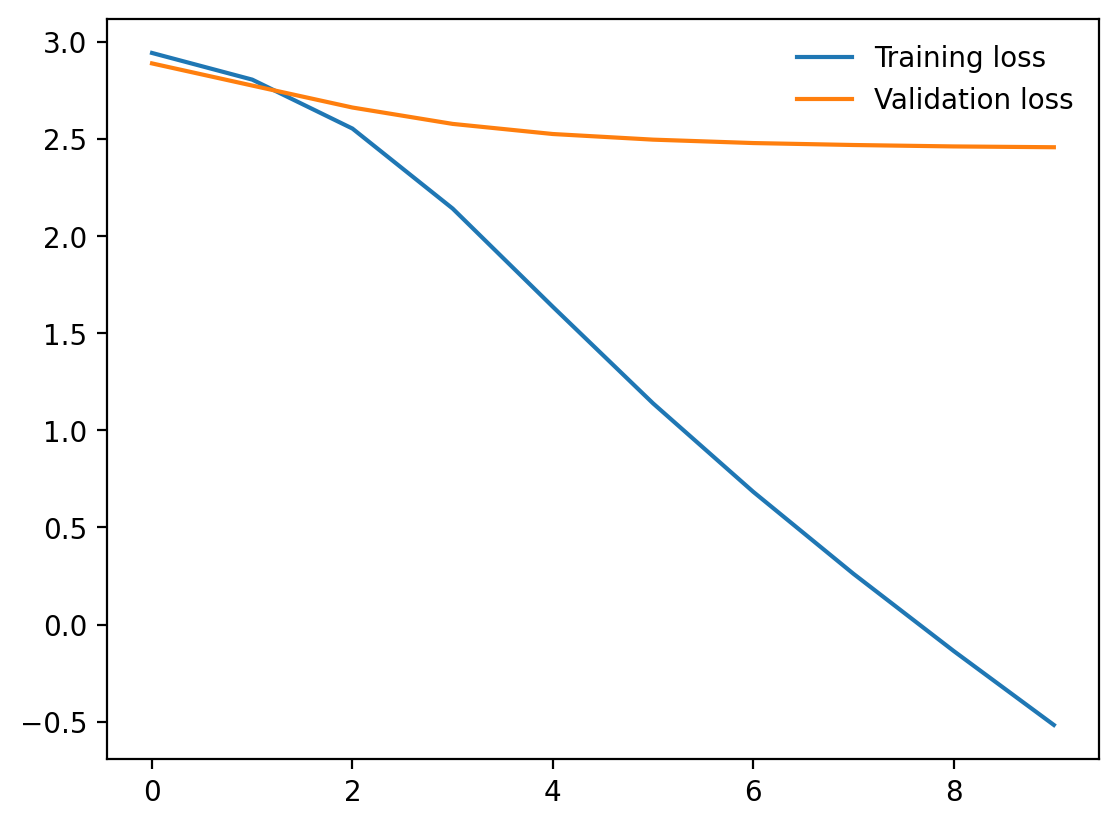

In [ ]:
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)

In [ ]:
model._net.load_state_dict(torch.load('model_cf.pt'))

<All keys matched successfully>

In [ ]:
test_loss, test_mae = model.test(test_dataloader,True)

RMSE: 3.40829252411845, MAE: 3.0567245483398438


Epoch 0: loss_train 12.600300529974056, loss_val 7.7281146163500605
Validation loss decreased (inf --> 7.728115).  Saving model ...
Epoch 1: loss_train 2.7258219064686404, loss_val 6.337763313415939
Validation loss decreased (7.728115 --> 6.337763).  Saving model ...
Epoch 2: loss_train 0.8437024218109042, loss_val 5.965773319396404
Validation loss decreased (6.337763 --> 5.965773).  Saving model ...
Epoch 3: loss_train 0.5933182744148954, loss_val 5.708184825526186
Validation loss decreased (5.965773 --> 5.708185).  Saving model ...
Epoch 4: loss_train 0.48548106198733904, loss_val 5.427499094135978
Validation loss decreased (5.708185 --> 5.427499).  Saving model ...
Epoch 5: loss_train 0.4164294642345708, loss_val 5.201711555503973
Validation loss decreased (5.427499 --> 5.201712).  Saving model ...
Epoch 6: loss_train 0.4195956251694384, loss_val 4.933526294242382
Validation loss decreased (5.201712 --> 4.933526).  Saving model ...
Epoch 7: loss_train 0.3949221943310335, loss_val 4.

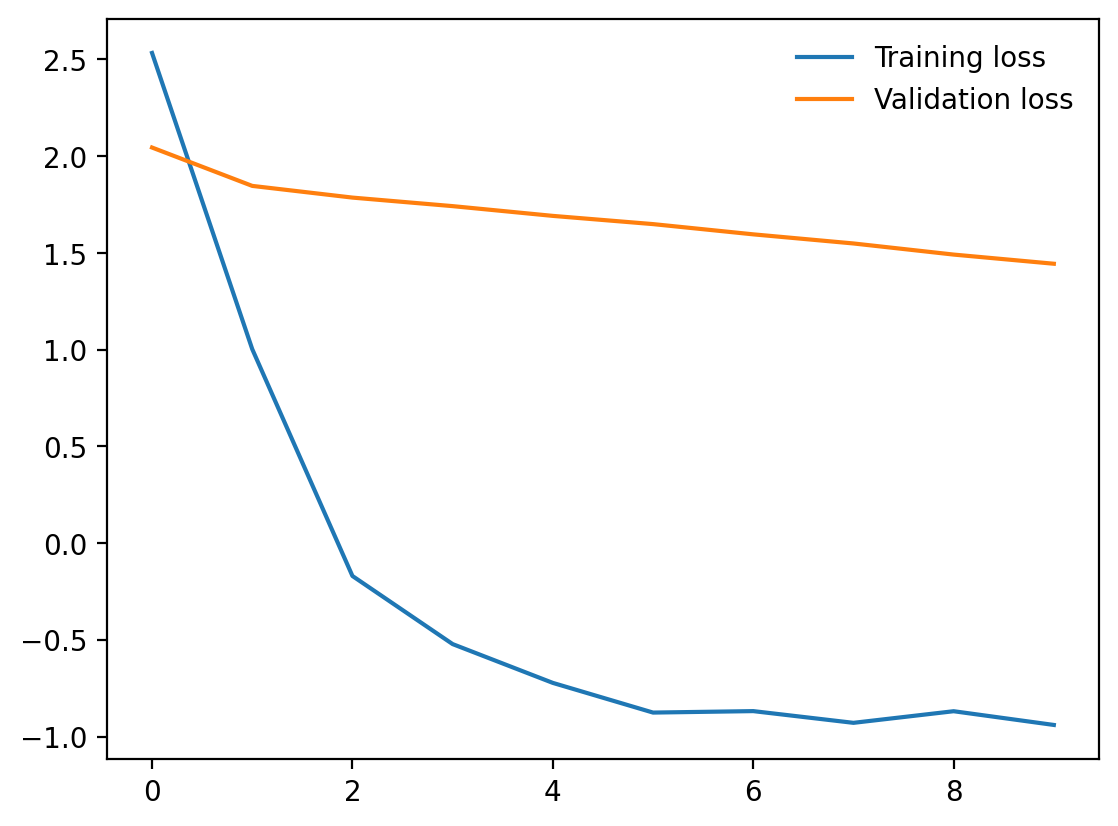

In [ ]:
# trial: 2
model = FactorizationModel(embedding_dim=32,
                                   n_iter=10,
                                   learning_rate=0.01,
                                   l2=1e-8,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Epoch 0: loss_train 12.62100218213751, loss_val 7.760018159006469
Validation loss decreased (inf --> 7.760018).  Saving model ...
Epoch 1: loss_train 2.697840304672505, loss_val 6.3130257823008815
Validation loss decreased (7.760018 --> 6.313026).  Saving model ...
Epoch 2: loss_train 0.7509613575983566, loss_val 5.997684011448116
Validation loss decreased (6.313026 --> 5.997684).  Saving model ...
Epoch 3: loss_train 0.5597750640336706, loss_val 5.741472150860632
Validation loss decreased (5.997684 --> 5.741472).  Saving model ...
Epoch 4: loss_train 0.47830489868608334, loss_val 5.4745085361019825
Validation loss decreased (5.741472 --> 5.474509).  Saving model ...
Epoch 5: loss_train 0.42680452727779, loss_val 5.233950663367056
Validation loss decreased (5.474509 --> 5.233951).  Saving model ...
Epoch 6: loss_train 0.4320872003210709, loss_val 4.959540415613086
Validation loss decreased (5.233951 --> 4.959540).  Saving model ...
Epoch 7: loss_train 0.4045054320194215, loss_val 4.730

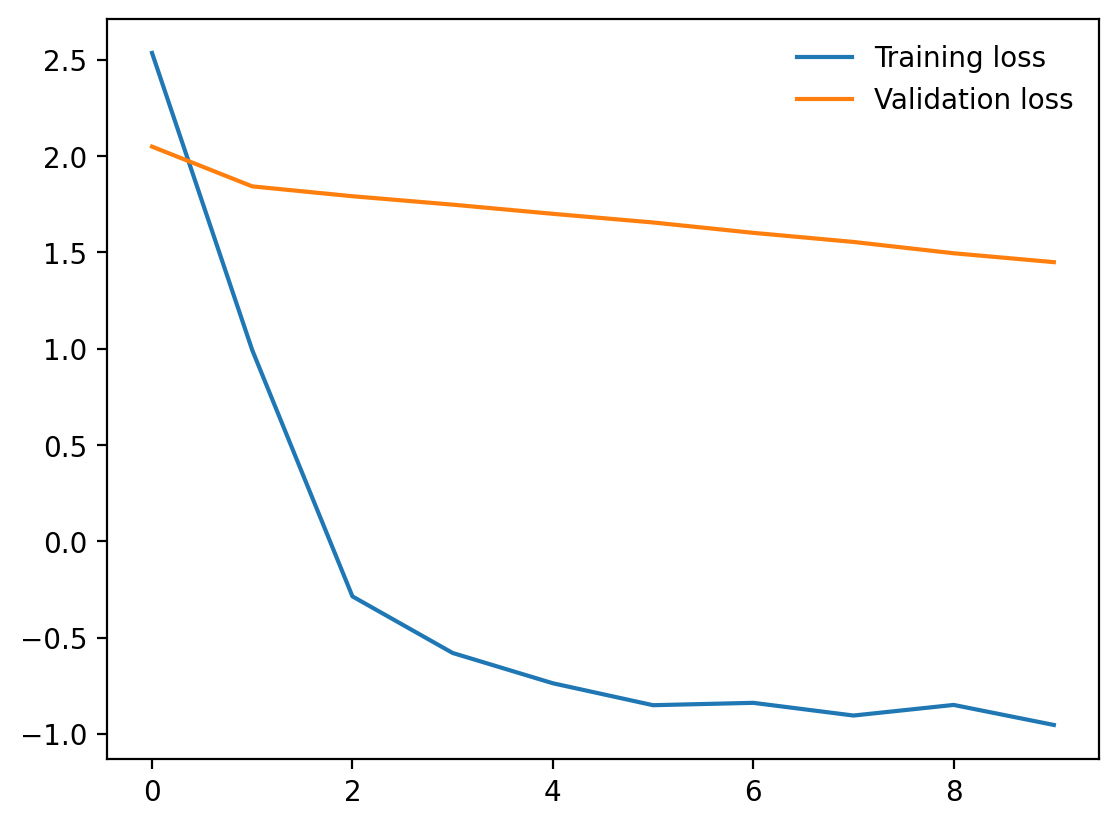

In [ ]:
# trial: 3
model = FactorizationModel(embedding_dim=32,
                                   n_iter=10,
                                   learning_rate=0.01,
                                   l2=1e-9,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Epoch 0: loss_train 12.607526571739786, loss_val 7.731399197547234
Validation loss decreased (inf --> 7.731399).  Saving model ...
Epoch 1: loss_train 2.7612580713350154, loss_val 6.332766145839269
Validation loss decreased (7.731399 --> 6.332766).  Saving model ...
Epoch 2: loss_train 0.9888993430991829, loss_val 5.953733574128672
Validation loss decreased (6.332766 --> 5.953734).  Saving model ...
Epoch 3: loss_train 0.6317491437546573, loss_val 5.6708018690787805
Validation loss decreased (5.953734 --> 5.670802).  Saving model ...
Epoch 4: loss_train 0.4987357174227306, loss_val 5.4056540998557505
Validation loss decreased (5.670802 --> 5.405654).  Saving model ...
Epoch 5: loss_train 0.4441097547090917, loss_val 5.17240221989967
Validation loss decreased (5.405654 --> 5.172402).  Saving model ...
Epoch 6: loss_train 0.4218154273606214, loss_val 4.908790249734135
Validation loss decreased (5.172402 --> 4.908790).  Saving model ...
Epoch 7: loss_train 0.39307518157311455, loss_val 4.

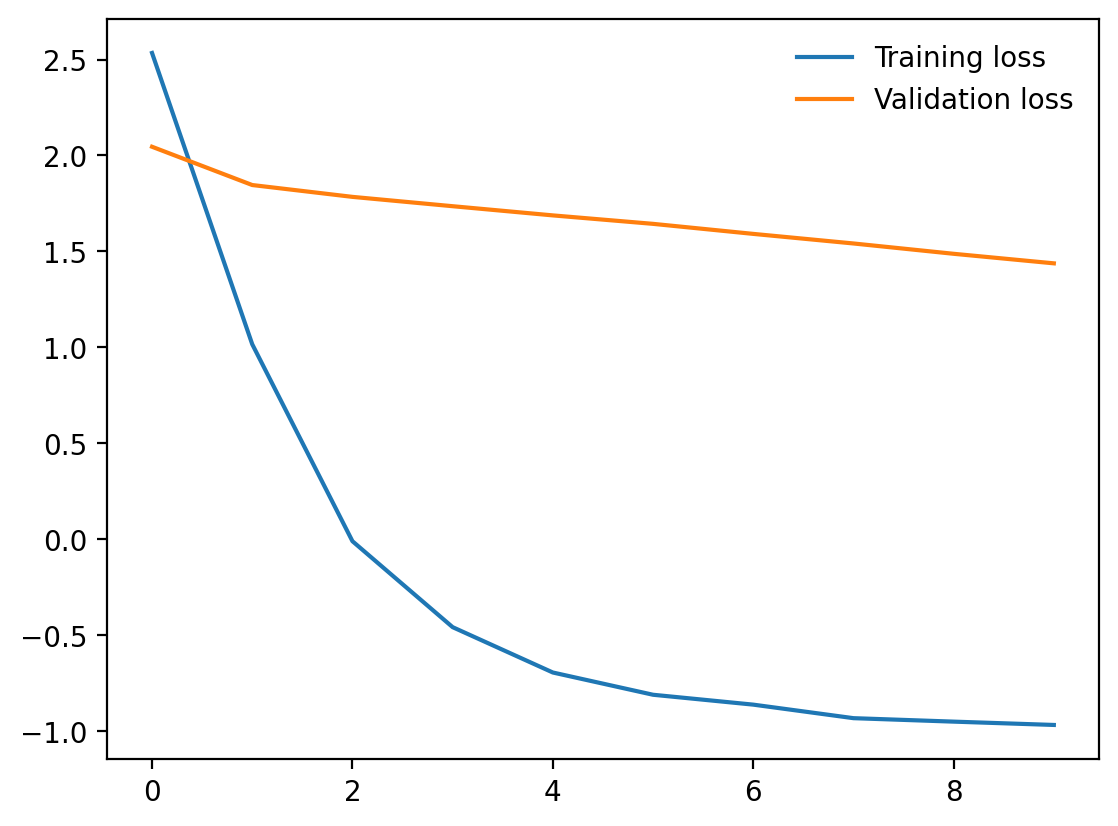

In [ ]:
# trial: 4
model = FactorizationModel(embedding_dim=32,
                                   n_iter=10,
                                   learning_rate=0.01,
                                   l2=2e-8,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Epoch 0: loss_train 12.58171765742447, loss_val 7.707129748225612
Validation loss decreased (inf --> 7.707130).  Saving model ...
Epoch 1: loss_train 2.4103388286671255, loss_val 6.691536769648867
Validation loss decreased (7.707130 --> 6.691537).  Saving model ...
Epoch 2: loss_train 1.1695410679920513, loss_val 6.233563841422757
Validation loss decreased (6.691537 --> 6.233564).  Saving model ...
Epoch 3: loss_train 1.3027189294271349, loss_val 5.875762930101261
Validation loss decreased (6.233564 --> 5.875763).  Saving model ...
Epoch 4: loss_train 0.9188082643060543, loss_val 5.492245774223924
Validation loss decreased (5.875763 --> 5.492246).  Saving model ...
Epoch 5: loss_train 0.6845827165454171, loss_val 5.192648301486793
Validation loss decreased (5.492246 --> 5.192648).  Saving model ...
Epoch 6: loss_train 0.6226474826854798, loss_val 4.895858536347578
Validation loss decreased (5.192648 --> 4.895859).  Saving model ...
Epoch 7: loss_train 0.5993079597724686, loss_val 4.629

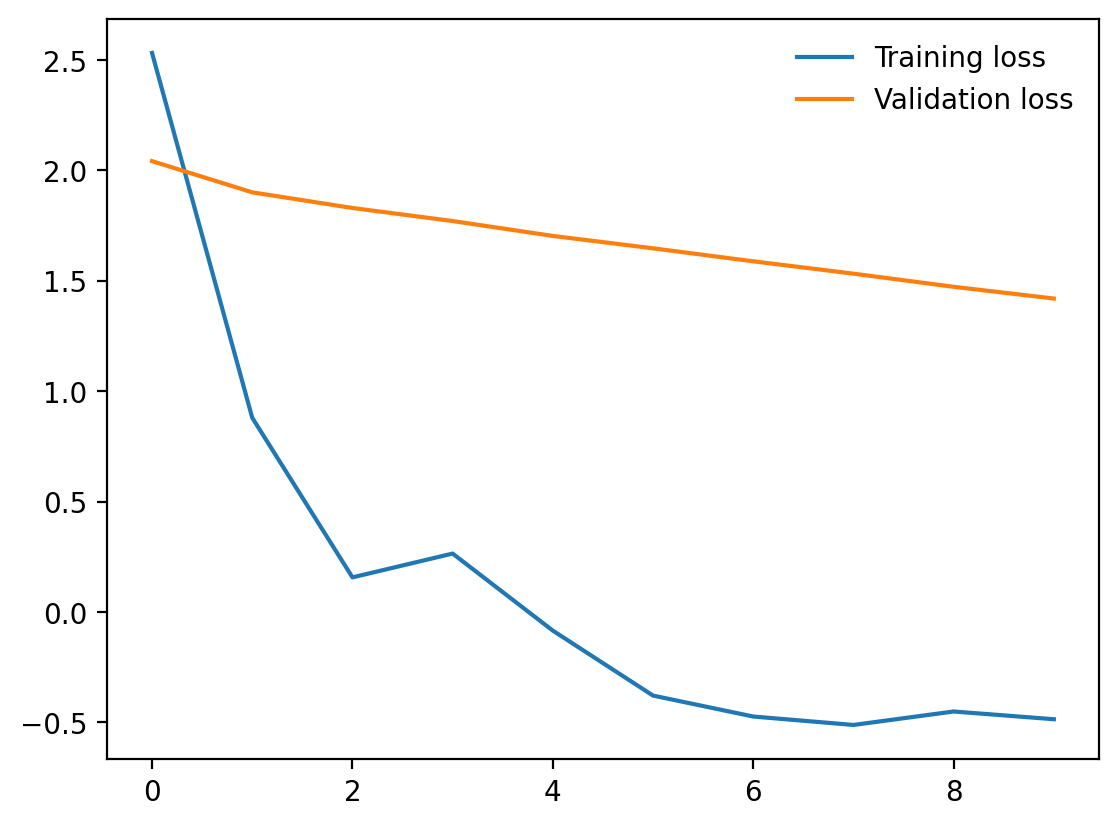

In [ ]:
# trial: 5
model = FactorizationModel(embedding_dim=64,
                                   n_iter=10,
                                   learning_rate=0.01,
                                   l2=1e-8,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Epoch 0: loss_train 7.853797396584899, loss_val 4.32344120956361
Validation loss decreased (inf --> 4.323441).  Saving model ...
Epoch 1: loss_train 9.87173375119631, loss_val 4.042306226453141
Validation loss decreased (4.323441 --> 4.042306).  Saving model ...
Epoch 2: loss_train 14.019905863638547, loss_val 3.7053376170708994
Validation loss decreased (4.042306 --> 3.705338).  Saving model ...
Epoch 3: loss_train 16.697710968666613, loss_val 3.462812360322597
Validation loss decreased (3.705338 --> 3.462812).  Saving model ...
Epoch 4: loss_train 10.579167022015078, loss_val 3.3987295959279837
Validation loss decreased (3.462812 --> 3.398730).  Saving model ...
Epoch 5: loss_train 10.196061878583992, loss_val 3.4648991641441214
Epoch 6: loss_train 10.531215521500751, loss_val 3.4806623059255783
Epoch 7: loss_train 10.761530022302244, loss_val 3.421344856996688
Epoch 8: loss_train 10.43420712861936, loss_val 3.435767281520971
Epoch 9: loss_train 10.317461819939563, loss_val 3.3420063

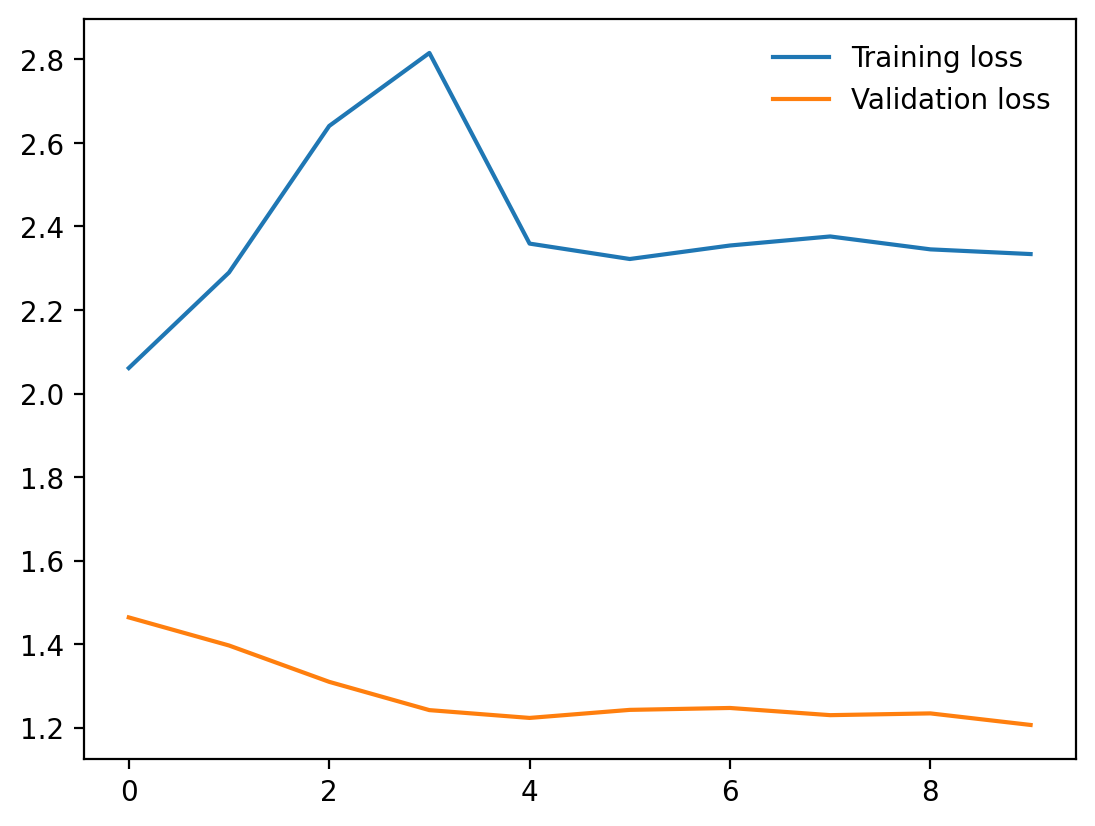

In [ ]:
# trial: 6
model = FactorizationModel(embedding_dim=64,
                                   n_iter=10,
                                   learning_rate=0.03,
                                   l2=2e-8,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Epoch 0: loss_train 18.922603384500757, loss_val 17.8932042925759
Validation loss decreased (inf --> 17.893204).  Saving model ...
Epoch 1: loss_train 15.814295356728486, loss_val 15.716605490108067
Validation loss decreased (17.893204 --> 15.716605).  Saving model ...
Epoch 2: loss_train 10.12004065068332, loss_val 14.216678120701497
Validation loss decreased (15.716605 --> 14.216678).  Saving model ...
Epoch 3: loss_train 4.995043017575532, loss_val 13.552304799675689
Validation loss decreased (14.216678 --> 13.552305).  Saving model ...
Epoch 4: loss_train 2.488261503890527, loss_val 13.287825386684016
Validation loss decreased (13.552305 --> 13.287825).  Saving model ...
Epoch 5: loss_train 1.3606537297112724, loss_val 13.169127453870855
Validation loss decreased (13.287825 --> 13.169127).  Saving model ...
Epoch 6: loss_train 0.7965292474502178, loss_val 13.095276599059655
Validation loss decreased (13.169127 --> 13.095277).  Saving model ...
Epoch 7: loss_train 0.4953418845276727

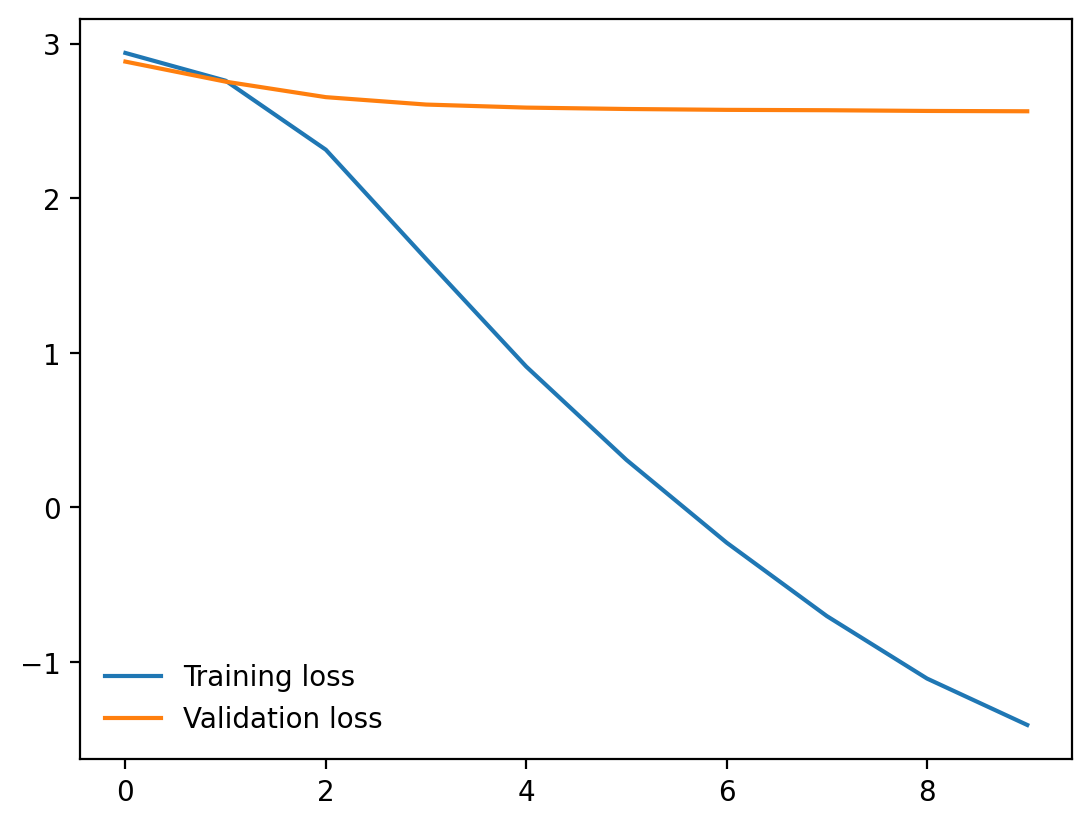

In [ ]:
# trial: 7
model = FactorizationModel(embedding_dim=64,
                                   n_iter=10,
                                   learning_rate=0.001,
                                   l2=2e-8,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Epoch 0: loss_train 8.637859465549806, loss_val 6.5404345298467055
Validation loss decreased (inf --> 6.540435).  Saving model ...
Epoch 1: loss_train 47.691738133173025, loss_val 6.713958692095429
Epoch 2: loss_train 176.2659759253865, loss_val 6.313215748428787
Validation loss decreased (6.540435 --> 6.313216).  Saving model ...
Epoch 3: loss_train 161.02086695245129, loss_val 5.790805622135241
Validation loss decreased (6.313216 --> 5.790806).  Saving model ...
Epoch 4: loss_train 53.335788517703094, loss_val 6.1319448304568285
Epoch 5: loss_train 44.14462998462039, loss_val 6.2905378476424
Epoch 6: loss_train 43.18633811848992, loss_val 6.3278466319368984
Epoch 7: loss_train 42.31278809093971, loss_val 6.5544703650770275
Epoch 8: loss_train 40.48200122275692, loss_val 6.422778184665026
Epoch 9: loss_train 39.06555075662388, loss_val 6.359265517276486
Epoch 10: loss_train 39.214506394023424, loss_val 6.119998623148576
Epoch 11: loss_train 40.58179480953107, loss_val 6.76818731220779

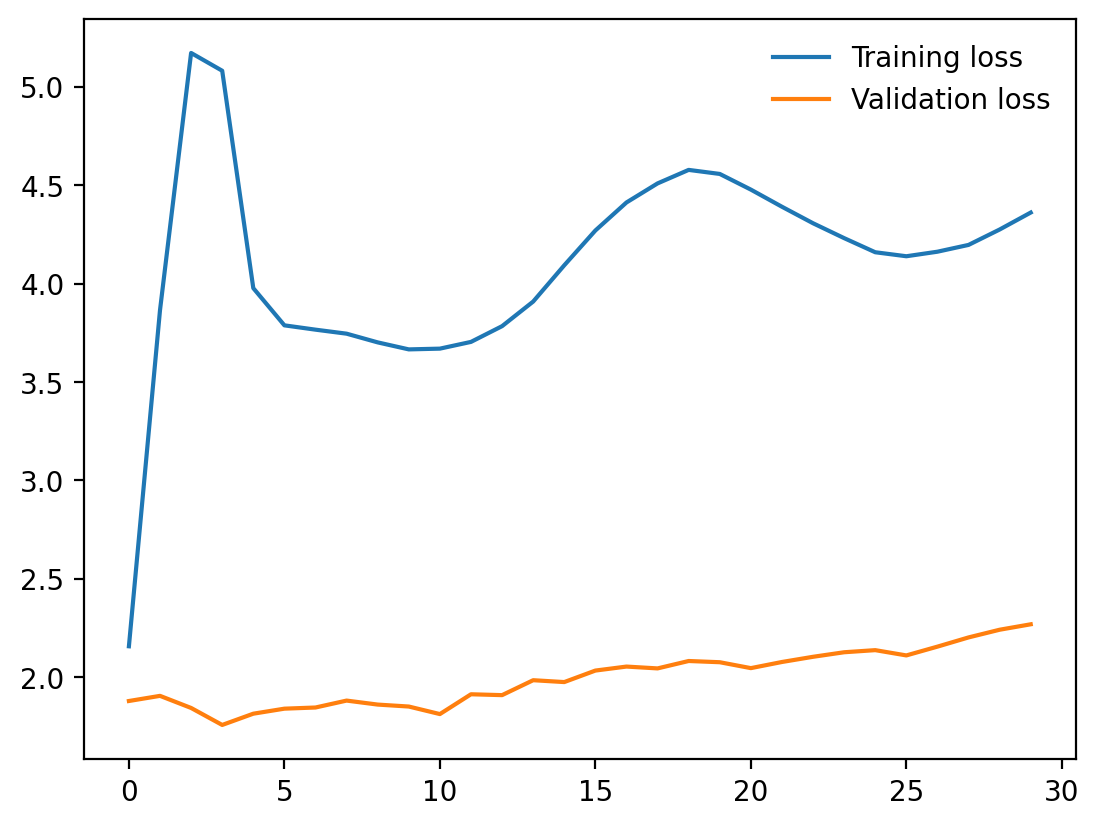

In [ ]:
# trial: 8
model = FactorizationModel(embedding_dim=128,
                                   n_iter=30,
                                   learning_rate=0.03,
                                   l2=2e-10,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Epoch 0: loss_train 7.688508753170213, loss_val 3.8010088278866885
Validation loss decreased (inf --> 3.801009).  Saving model ...
Epoch 1: loss_train 3.591174136411079, loss_val 3.825361510429025
Epoch 2: loss_train 10.825782167480469, loss_val 3.6036168170119196
Validation loss decreased (3.801009 --> 3.603617).  Saving model ...
Epoch 3: loss_train 11.776111338541671, loss_val 3.222228317977671
Validation loss decreased (3.603617 --> 3.222228).  Saving model ...
Epoch 4: loss_train 3.944935525188438, loss_val 3.0515506975263293
Validation loss decreased (3.222228 --> 3.051551).  Saving model ...
Epoch 5: loss_train 3.0415875506833685, loss_val 2.935179787606292
Validation loss decreased (3.051551 --> 2.935180).  Saving model ...
Epoch 6: loss_train 2.7571893006057167, loss_val 2.8867392084505914
Validation loss decreased (2.935180 --> 2.886739).  Saving model ...
Epoch 7: loss_train 2.7573745983801374, loss_val 2.8436730252078886
Validation loss decreased (2.886739 --> 2.843673).  S

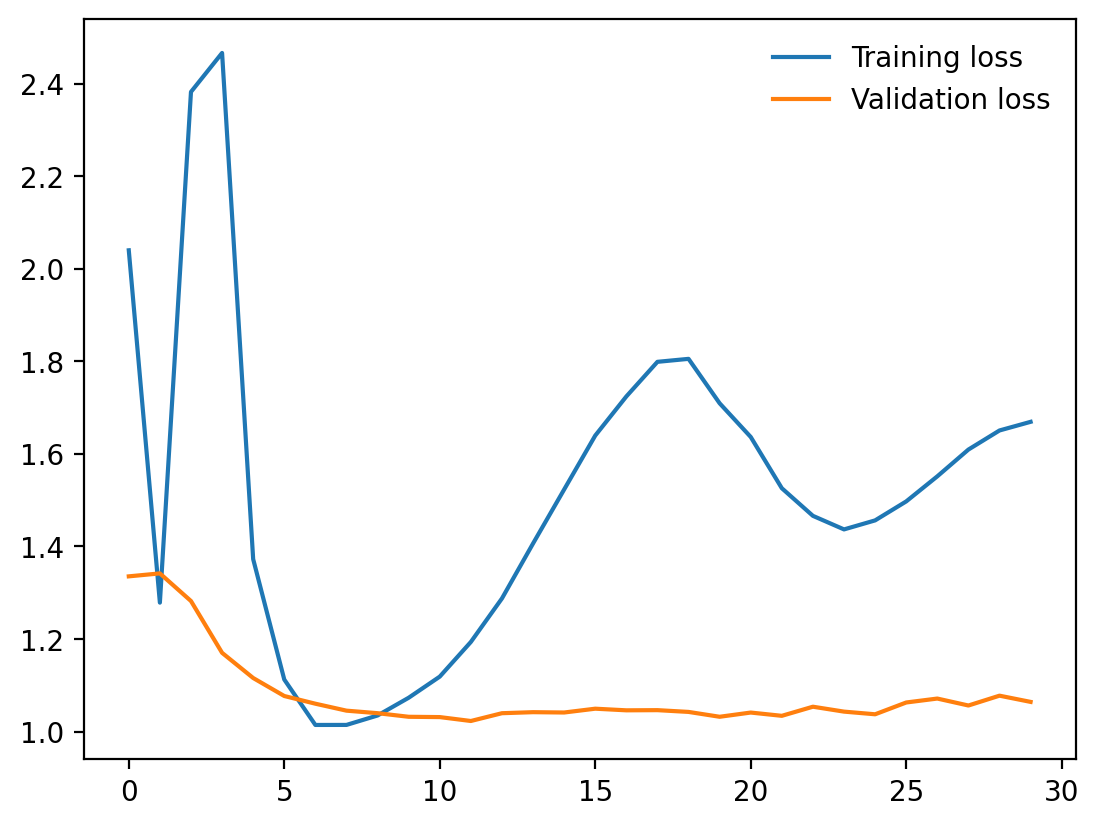

In [ ]:
# trial: 9
model = FactorizationModel(embedding_dim=32,
                                   n_iter=30,
                                   learning_rate=0.03,
                                   l2=2e-10,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Epoch 0: loss_train 6.647682305939769, loss_val 5.428124887333579
Validation loss decreased (inf --> 5.428125).  Saving model ...
Epoch 1: loss_train 21.886557614873254, loss_val 5.373812588012768
Validation loss decreased (5.428125 --> 5.373813).  Saving model ...
Epoch 2: loss_train 79.42874035335872, loss_val 5.004410358919831
Validation loss decreased (5.373813 --> 5.004410).  Saving model ...
Epoch 3: loss_train 79.41519815979862, loss_val 4.858029314368133
Validation loss decreased (5.004410 --> 4.858029).  Saving model ...
Epoch 4: loss_train 27.81850640728609, loss_val 5.148552656923595
Epoch 5: loss_train 22.077731189410265, loss_val 5.25054724329228
Epoch 6: loss_train 20.890977386236482, loss_val 5.3547099826345
Epoch 7: loss_train 20.195472986790037, loss_val 5.4574337043946795
Epoch 8: loss_train 19.534997474334098, loss_val 5.412117692260238
Epoch 9: loss_train 19.149258656774766, loss_val 5.33165908637931
Epoch 10: loss_train 19.16024852186496, loss_val 5.514185831750229

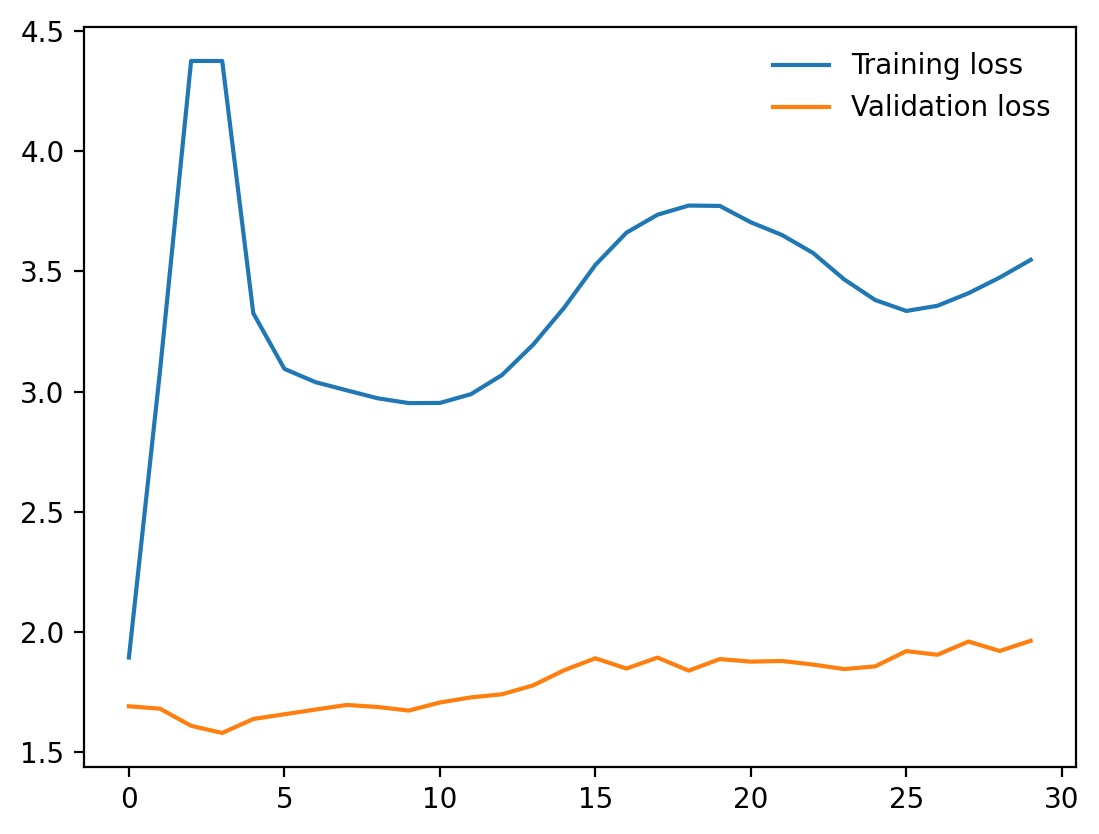

In [ ]:
# trial: 10
model = FactorizationModel(embedding_dim=32,
                                   n_iter=30,
                                   learning_rate=0.05,
                                   l2=2e-10,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Epoch 0: loss_train 7.8959929356066825, loss_val 4.428672981016765
Validation loss decreased (inf --> 4.428673).  Saving model ...
Epoch 1: loss_train 11.832467813872187, loss_val 4.572053752912731
Epoch 2: loss_train 43.275808372817714, loss_val 4.28684276367202
Validation loss decreased (4.428673 --> 4.286843).  Saving model ...
Epoch 3: loss_train 41.975250145125585, loss_val 3.916266674994547
Validation loss decreased (4.286843 --> 3.916267).  Saving model ...
Epoch 4: loss_train 13.659331434426223, loss_val 3.791701483699096
Validation loss decreased (3.916267 --> 3.791701).  Saving model ...
Epoch 5: loss_train 10.810382911580739, loss_val 3.799549980132124
Epoch 6: loss_train 10.348129799071794, loss_val 3.7701125002214377
Validation loss decreased (3.791701 --> 3.770113).  Saving model ...
Epoch 7: loss_train 10.3520977248242, loss_val 3.777080607631833
Epoch 8: loss_train 10.278349924189547, loss_val 3.770745254365419
Epoch 9: loss_train 10.392834230393094, loss_val 3.76074650

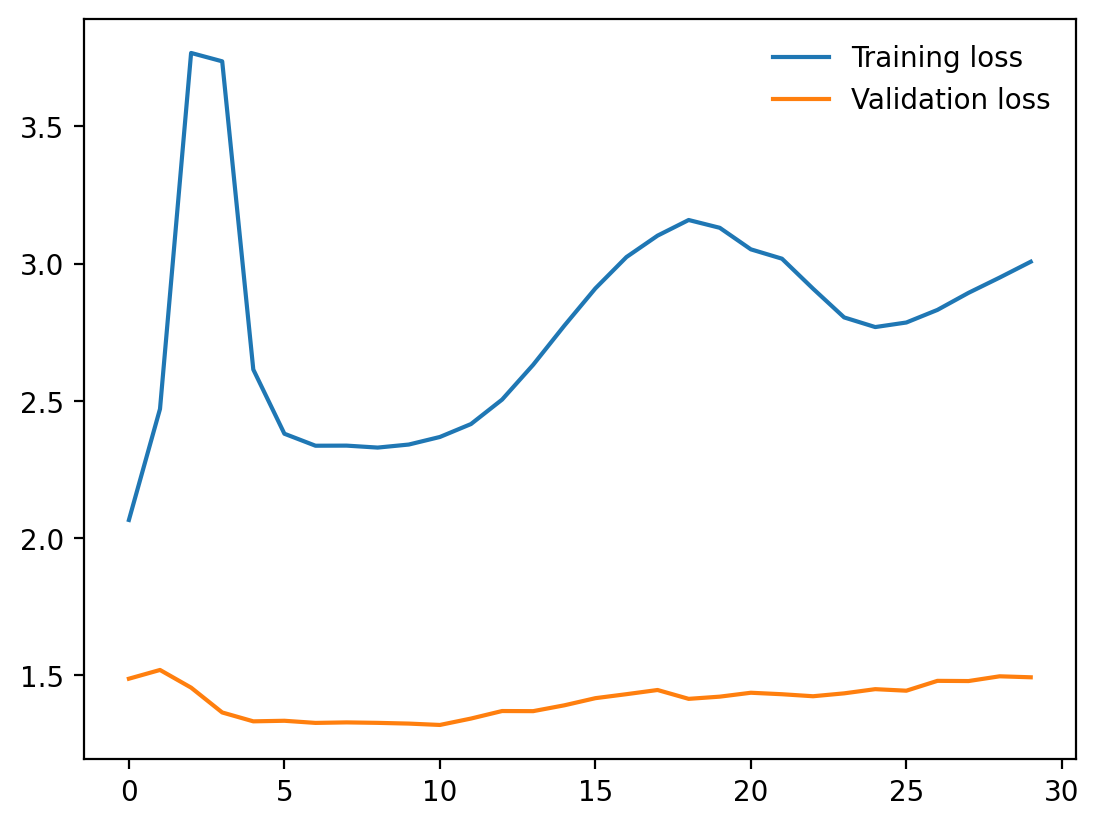

In [ ]:
# trial: 11
model = FactorizationModel(embedding_dim=64,
                                   n_iter=30,
                                   learning_rate=0.03,
                                   l2=2e-10,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Epoch 0: loss_train 7.608155754309642, loss_val 3.578335023752604
Validation loss decreased (inf --> 3.578335).  Saving model ...
Epoch 1: loss_train 1.689782051857073, loss_val 3.529735852338255
Validation loss decreased (3.578335 --> 3.529736).  Saving model ...
Epoch 2: loss_train 2.9813750619388313, loss_val 3.2961897368653412
Validation loss decreased (3.529736 --> 3.296190).  Saving model ...
Epoch 3: loss_train 3.177191771031292, loss_val 2.9905481470936772
Validation loss decreased (3.296190 --> 2.990548).  Saving model ...
Epoch 4: loss_train 1.4704964627909833, loss_val 2.8164648074504224
Validation loss decreased (2.990548 --> 2.816465).  Saving model ...
Epoch 5: loss_train 1.1742805079005187, loss_val 2.694477028315184
Validation loss decreased (2.816465 --> 2.694477).  Saving model ...
Epoch 6: loss_train 1.0117518331321809, loss_val 2.6150964156542353
Validation loss decreased (2.694477 --> 2.615096).  Saving model ...
Epoch 7: loss_train 0.9907950704477545, loss_val 2.5

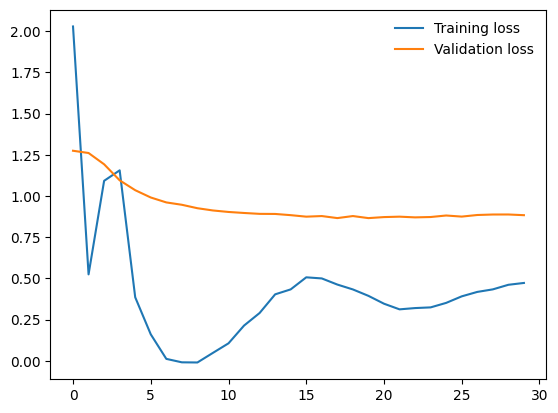

In [ ]:
# trial: 12
model = FactorizationModel(embedding_dim=16,
                                   n_iter=30,
                                   learning_rate=0.03,
                                   l2=2e-11,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

In [ ]:
# trial: 13
model = FactorizationModel(embedding_dim=16,
                                   n_iter=50,
                                   learning_rate=0.03,
                                   l2=2e-13,
                                   num_users=total_user_id,
                                   num_items=total_item_id)
train_losses,valid_losses,valid_maes =model.fit(train_dataloader,val_dataloader)
plt.plot(np.log(train_losses), label='Training loss')
plt.plot(np.log(valid_losses), label='Validation loss')
plt.legend(frameon=False)
test_loss, test_mae = model.test(test_dataloader,True)
print("test_loss, test_mae: ", test_loss, test_mae)

Exception ignored in: <function _xla_gc_callback at 0x7f61cc50b400>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 101, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


Epoch 0: loss_train 7.611045725724682, loss_val 3.589253749449383
Validation loss decreased (inf --> 3.589254).  Saving model ...
Epoch 1: loss_train 1.6817261263233758, loss_val 3.5335021728044635
Validation loss decreased (3.589254 --> 3.533502).  Saving model ...


KeyboardInterrupt: ignored

In [ ]:
cdata.head()

,reviewerID,asin,overall,unixReviewTime,title,brand,asin_id
0,379227,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,6
1,379227,B00002N7IL,5.0,1426809600,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,6
2,383126,B00002N7IL,5.0,1522022400,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,6
3,383126,B00002N7IL,5.0,1522022400,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,6
4,498498,B00002N7IL,5.0,1521504000,"Leviton 5206 50 Amp, 125/250 Volt, NEMA 10-50R...",Leviton,6


In [ ]:
numitem_2_name = {i:name for name,i in np.asarray(cdata[['title', 'asin_id']])}
name_2_numitem = {name:i for name,i in np.asarray(cdata[['title', 'asin_id']])}

In [ ]:
my_rating = {}

for x, y, z in test_dataset:  # reviewerID, asin, rating
    x = int(x)
    z = int(z)
    if x not in my_rating:
        my_rating[x] = []
    my_rating[x].append(z)

print(my_rating)

{362019: [4], 243032: [5], 291762: [5, 1], 49199: [1], 196356: [1], 37302: [1], 13569: [5], 404: [5], 107376: [2, 2], 125185: [5], 390560: [5], 156532: [5], 281243: [5], 208137: [5], 23102: [5], 272993: [5], 69788: [5], 374673: [5], 306355: [4], 266749: [5], 253723: [4], 36107: [5], 365940: [1], 342739: [4], 276925: [1], 303575: [3], 354746: [3], 346590: [3], 327581: [5], 16384: [4], 477037: [5], 176177: [5], 476022: [5], 142760: [5], 195650: [5], 326138: [5], 512718: [2], 125394: [5, 5], 160433: [5], 445991: [5], 262498: [5], 270691: [5], 441550: [5], 67079: [5], 264146: [5], 403449: [5], 419809: [5], 222603: [5], 88987: [5], 112685: [1], 278477: [5], 182907: [1], 39119: [5], 325115: [5], 384611: [5], 290367: [4], 432079: [5], 169659: [2], 34510: [3], 170921: [2], 480319: [5], 291778: [2], 55332: [5], 441269: [1], 493447: [5], 315194: [2], 76649: [4], 192704: [5], 275087: [4], 157723: [5], 353454: [4], 334879: [5], 473141: [5], 357650: [5], 447016: [5], 154291: [1], 138829: [5], 28968

In [ ]:
modified_ratings = {}
for reviewer_id, ratings_list in my_rating.items():
    if len(ratings_list) > 0:
        modified_ratings[reviewer_id] = ratings_list[0]

print(modified_ratings)
my_ratings = modified_ratings
print(len(my_rating))

{362019: 4, 243032: 5, 291762: 5, 49199: 1, 196356: 1, 37302: 1, 13569: 5, 404: 5, 107376: 2, 125185: 5, 390560: 5, 156532: 5, 281243: 5, 208137: 5, 23102: 5, 272993: 5, 69788: 5, 374673: 5, 306355: 4, 266749: 5, 253723: 4, 36107: 5, 365940: 1, 342739: 4, 276925: 1, 303575: 3, 354746: 3, 346590: 3, 327581: 5, 16384: 4, 477037: 5, 176177: 5, 476022: 5, 142760: 5, 195650: 5, 326138: 5, 512718: 2, 125394: 5, 160433: 5, 445991: 5, 262498: 5, 270691: 5, 441550: 5, 67079: 5, 264146: 5, 403449: 5, 419809: 5, 222603: 5, 88987: 5, 112685: 1, 278477: 5, 182907: 1, 39119: 5, 325115: 5, 384611: 5, 290367: 4, 432079: 5, 169659: 2, 34510: 3, 170921: 2, 480319: 5, 291778: 2, 55332: 5, 441269: 1, 493447: 5, 315194: 2, 76649: 4, 192704: 5, 275087: 4, 157723: 5, 353454: 4, 334879: 5, 473141: 5, 357650: 5, 447016: 5, 154291: 1, 138829: 5, 28968: 5, 340739: 5, 175915: 5, 451000: 5, 255661: 4, 367251: 5, 331439: 2, 397031: 5, 93975: 5, 504121: 1, 200313: 5, 248169: 5, 166123: 4, 335754: 5, 310761: 1, 40978

In [ ]:
my_ratings = {int(y): int(z) for x, y, z in test_dataset[2:53]}
print(my_ratings)

{7009: 5, 7836: 1, 28664: 1, 11902: 1, 16237: 5, 264: 5, 22154: 2, 61: 5, 7347: 5, 4724: 5, 10545: 5, 5739: 5, 6840: 5, 26245: 5, 28187: 5, 12782: 5, 11800: 4, 6791: 5, 5364: 4, 5571: 3, 11405: 1, 553: 4, 28787: 5, 3088: 3, 379: 3, 12780: 5, 1927: 4, 12692: 5, 12226: 5, 2052: 5, 12398: 5, 18393: 5, 12786: 5, 25939: 2, 12607: 5, 980: 5, 28634: 5, 19519: 5, 6844: 5, 22489: 5, 176: 5, 21121: 5, 18664: 5, 21801: 5, 29617: 5, 4064: 1, 3929: 5, 23918: 1, 2076: 5}


In [ ]:
my_rated_items = [name for name in list(my_ratings.keys())]

In [ ]:
item_emb_np = model._net.item_embeddings.weight.data.cpu().numpy()

In [ ]:
len(my_rated_items)

49

In [ ]:
item_emb_np.shape

(30238, 16)

In [ ]:
# item_emb_np[my_rated_items, :]

In [ ]:
my_rated_items = [x for x in list(my_ratings.keys())]
len(my_rated_items)

49

In [ ]:
len(my_ratings)

49

In [ ]:
item_emb_np.shape

(30238, 16)

In [ ]:
my_rated_items = [name for name in list(my_ratings.keys())]

In [ ]:
item_emb_np.shape

(30238, 16)

In [ ]:
cdata.sort_values(['asin_id'])

,reviewerID,asin,overall,unixReviewTime,title,brand,asin_id
553851,152716,7301113188,5.0,1236902400,Tupperware Freezer Square Round Container Set ...,Tupperware,0
551259,313589,7861850250,3.0,1484352000,2 X Tupperware Pure &amp; Fresh Unique Covered...,Tupperware,1
551260,390275,8792559360,5.0,1483056000,The Cigar - Moments of Pleasure,The Cigar Book,2
551261,414178,8792559360,5.0,1481673600,The Cigar - Moments of Pleasure,The Cigar Book,2
551262,462539,8792559360,5.0,1481673600,The Cigar - Moments of Pleasure,The Cigar Book,2
...,...,...,...,...,...,...,...
615745,473194,B01HJH92JQ,1.0,1521763200,Bosch 00175338 Switch,Bosch,30235
615746,44983,B01HJH92JQ,3.0,1515369600,Bosch 00175338 Switch,Bosch,30235
615743,209079,B01HJHHEA0,2.0,1533081600,Frigidaire 316543810 Knob,Frigidaire,30236
615744,80798,B01HJHHEA0,5.0,1523577600,Frigidaire 316543810 Knob,Frigidaire,30236


In [ ]:
item_emb_np[my_rated_items, :]

array([[ 1.58050150e-01,  1.81820124e-01,  4.57268089e-01,
        -2.29406163e-01,  3.06286842e-01,  2.02132463e-01,
        -9.03116405e-01, -2.42122129e-01,  4.79612082e-01,
         4.72114950e-01, -5.06065428e-01,  9.36161503e-02,
         7.02587306e-01, -6.20734572e-01,  3.13299000e-01,
         2.34630227e-01],
       [-1.12277251e-02, -2.94635221e-02, -1.41263381e-01,
        -2.11930946e-01,  1.34301469e-01,  2.80957222e-01,
        -8.10959004e-03,  2.21304912e-02,  1.35510750e-02,
         6.59354702e-02, -9.83003676e-02,  4.36639264e-02,
        -1.22251101e-02,  8.92714411e-02, -8.75151679e-02,
         4.63141799e-02],
       [ 5.82931377e-02,  6.17391765e-02,  1.49174677e-02,
         3.58111188e-02,  7.52307102e-02,  9.42990929e-02,
         5.44393668e-03,  7.70642310e-02, -5.10473661e-02,
        -3.32293920e-02,  4.62916456e-02,  4.44162413e-02,
         6.03601448e-02,  1.68386430e-01, -5.15549863e-03,
         7.45443925e-02],
       [-1.52742252e-01,  5.31839617e

In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1, fit_intercept=True)
clf.fit(item_emb_np[my_rated_items, :], list(my_ratings.values()))
my_emb_np = clf.coef_
my_emb_bias = clf.intercept_

In [ ]:
item_bias_np = model._net.item_biases.weight.data.cpu().numpy()
item_bias_np = item_bias_np.squeeze()

In [ ]:
item_bias_np.shape

(30238,)

In [ ]:
my_rating_results = (my_emb_np * item_emb_np).sum(1) + item_bias_np + my_emb_bias
my_results = [(numitem_2_name[item], ratings) for item, ratings in enumerate(my_rating_results)]
my_results_df = pd.DataFrame(my_results, columns = ["title", "pred_ratings"])

In [ ]:
my_results_df

,title,pred_ratings
0,Tupperware Freezer Square Round Container Set ...,5.174783
1,2 X Tupperware Pure &amp; Fresh Unique Covered...,4.368028
2,The Cigar - Moments of Pleasure,7.143115
3,Caraselle 2X 50G Appliance Descalene,9.020422
4,EATON Wiring 39CH-SP-L Arrow Hart 1-Gang Chrom...,7.446266
...,...,...
30233,Bosch 00494772 Sealing,6.794667
30234,Bosch 00642855 Sensor,7.480403
30235,Bosch 00175338 Switch,5.820933
30236,Frigidaire 316543810 Knob,6.546119


In [ ]:
my_results_df.describe()

,pred_ratings
count,30238.000000
mean,6.663879
std,1.540918
min,-0.730288
25%,5.560688
50%,6.829668
75%,7.848548
max,12.753796


In [150]:
# Set the model in evaluation mode
model._net.eval()

# Initialize a list to store all predictions
all_predictions = []

# Perform inference on the test dataset
with torch.no_grad():
    # Iterate through the test dataloader
    for batch_user, batch_item, batch_rating in test_dataloader:
        # Move data to the device (if not already on it)
        batch_user = batch_user.to(device)
        batch_item = batch_item.to(device)

        # Get predictions from the model
        predictions = model._net(batch_user, batch_item)

        # Append predictions from this batch to the list
        all_predictions.append(predictions.cpu().numpy())  # Assuming you want to store predictions as numpy arrays

# Concatenate predictions from all batches along the batch dimension
all_predictions = np.concatenate(all_predictions, axis=0)
# 'all_predictions' now contains predictions for the entire test dataset

# You can save 'all_predictions' using appropriate methods like np.save(), torch.save(), etc.
# Example using NumPy:
np.save('all_predictions.npy', all_predictions)


In [152]:
all_predictions.shape

(61575,)

In [154]:
all_predictions.max()

13.468788

In [155]:
all_predictions.min()

-8.504835

In [156]:
all_predictions.mean()

3.7665372

In [157]:
all_predictions.std()

1.1131943

In [160]:
len(test_dataloader)

61

In [161]:
# i = 1
# for batch_user, batch_item, batch_rating in test_dataloader:
#     print(i)
#     print("\nTest Dataloader - Batch Size:", len(batch_user))
#     print("Test Dataloader - User Num Shape:", batch_user.shape)
#     print("Test Dataloader - Item Num Shape:", batch_item.shape)
#     print("Test Dataloader - Rating Shape:", batch_rating.shape)
#     i+=1

In [147]:
for i, (batch_user, batch_item, batch_rating) in enumerate(test_dataloader):
    print(f"Batch {i+1}/{len(test_dataloader)}, User Num shape: {batch_user.shape}, Item Num shape: {batch_item.shape}, Rating shape: {batch_rating.shape}")


Batch 1/61, User Num shape: torch.Size([1024]), Item Num shape: torch.Size([1024]), Rating shape: torch.Size([1024])
Batch 2/61, User Num shape: torch.Size([1024]), Item Num shape: torch.Size([1024]), Rating shape: torch.Size([1024])
Batch 3/61, User Num shape: torch.Size([1024]), Item Num shape: torch.Size([1024]), Rating shape: torch.Size([1024])
Batch 4/61, User Num shape: torch.Size([1024]), Item Num shape: torch.Size([1024]), Rating shape: torch.Size([1024])
Batch 5/61, User Num shape: torch.Size([1024]), Item Num shape: torch.Size([1024]), Rating shape: torch.Size([1024])
Batch 6/61, User Num shape: torch.Size([1024]), Item Num shape: torch.Size([1024]), Rating shape: torch.Size([1024])
Batch 7/61, User Num shape: torch.Size([1024]), Item Num shape: torch.Size([1024]), Rating shape: torch.Size([1024])
Batch 8/61, User Num shape: torch.Size([1024]), Item Num shape: torch.Size([1024]), Rating shape: torch.Size([1024])
Batch 9/61, User Num shape: torch.Size([1024]), Item Num shape: 

In [148]:
60*1024 + 135

61575